In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
def load_from_sparsed(name, samples = 800, attributes = 100000):
    matrix = np.zeros((samples, attributes))
    with open(name, "r") as f:
        for (i, line) in enumerate(f):
            temp = f.readline()
            temp = temp.split(" ")
            index = [int(value)-1 for value in temp[:-1]]
            matrix[i, index] = 1
    return matrix

def count_pos(Y):
    ind = Y > 0
    posi = Y[ind]
    return posi.shape[0]

def goodness(new_train, new_class, n_estimators = 200, n_points = 100):
    traina = np.zeros((n_points, 4))
    testa = np.zeros(n_points)
    valida = np.zeros(n_points)
    
    valid = load_from_sparsed("dorothea_valid.data")
    testing = load_from_sparsed("dorothea_test.data")
    
    indicator = (0, 0)

    for i in range(n_points):
        rfc = RandomForestClassifier(n_estimators = n_estimators, n_jobs = -1)
        rfc.fit(new_train, new_class)
        
        trainp = rfc.predict(new_train)
        testp = rfc.predict(testing)
        validp = rfc.predict(valid)
        
        testa[i] = count_pos(testp)
        valida[i] = count_pos(validp)
        traina[i] = count_pos(trainp), rfc.score(new_train, new_class), rfc.score(posT, posC), rfc.score(negT, negC)
        
        ind = rfc.feature_importances_.argmax()
        max_ = rfc.feature_importances_[ind]
        if max_ > indicator[1]:
            indicator = (ind, max_)
        if i%10 == 0:
            print(i)
    print(indicator)
    return valida, testa, traina

In [3]:
completeT = load_from_sparsed("dorothea_train.data")
completeC = np.genfromtxt("dorothea_train.labels")

indp = completeC == 1
posT = completeT[indp,:]
posC = completeC[indp]
negT = completeT[np.logical_not(indp),:]
negC = completeC[np.logical_not(indp)]

In [4]:
np.random.shuffle(negT)
new_train = np.concatenate((posT,negT[:90]))
new_class = np.concatenate((posC,negC[:90]))

# 10 estimators

In [5]:
valida, testa, traina = goodness(new_train, new_class, n_estimators=10)
np.savetxt("valida_10.dat", valida)
np.savetxt("testa_10.dat", testa)
np.savetxt("traina_10.dat", traina)

0
10
20
30
40
50
60
70
80
90
(14133, 0.023570021918837575)


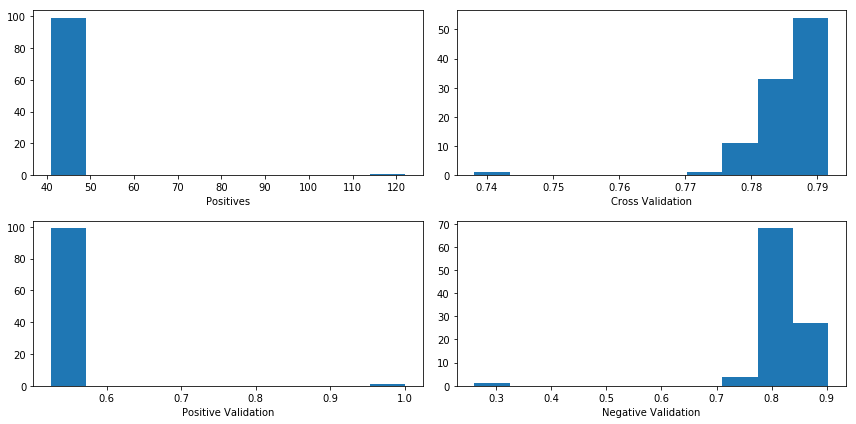

In [6]:
xlabel = ["Positives", "Cross Validation", "Positive Validation", "Negative Validation"]

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.reshape(4)
for i in range(4):
    axes[i].hist(traina[:, i])
    axes[i].set_xlabel(xlabel[i])
fig.tight_layout()

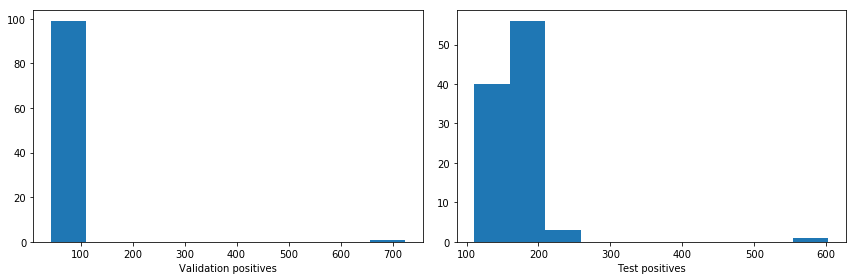

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.hist(valida)
ax2.hist(testa)
ax1.set_xlabel("Validation positives")
ax2.set_xlabel("Test positives")
fig.tight_layout()

# 200 estimators

In [8]:
valida_200, testa_200, traina_200 = goodness(new_train, new_class)
np.savetxt("valida_200.dat", valida_200)
np.savetxt("testa_200.dat", testa_200)
np.savetxt("traina_200.dat", traina_200)

0
10
20
30
40
50
60
70
80
90
(51758, 0.0040147699018775931)


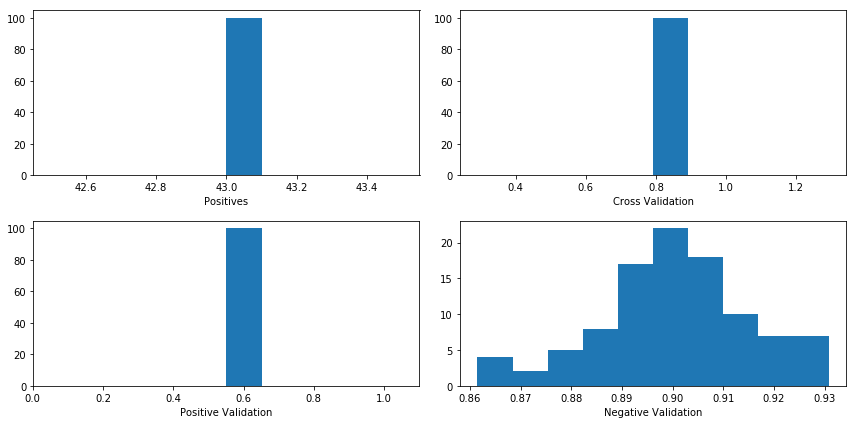

In [9]:
xlabel = ["Positives", "Cross Validation", "Positive Validation", "Negative Validation"]

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.reshape(4)
for i in range(4):
    axes[i].hist(traina_200[:, i])
    axes[i].set_xlabel(xlabel[i])
fig.tight_layout()

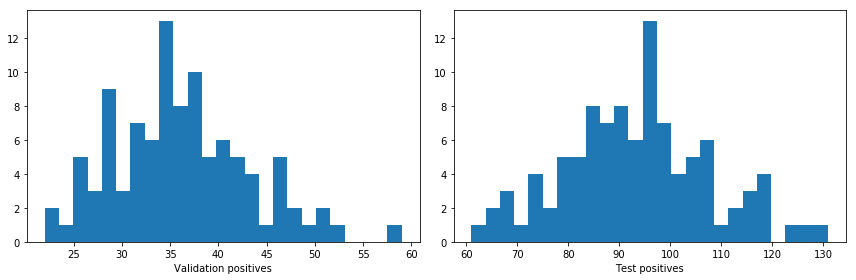

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.hist(valida_200, bins=25)
ax2.hist(testa_200, bins=25)
ax1.set_xlabel("Validation positives")
ax2.set_xlabel("Test positives")
fig.tight_layout()